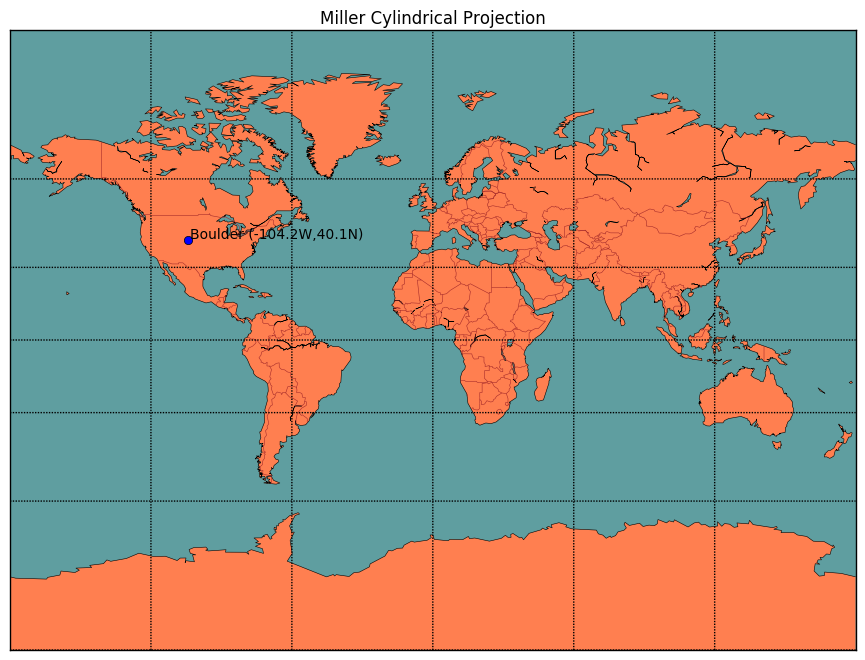

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# Increase size of map BEFORE Basemap()!!
plt.figure(figsize=(15,8))

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.fillcontinents(color='coral',lake_color='cadetblue')
m.drawcoastlines(linewidth=0.4)
m.drawcountries(linewidth=0.4, linestyle='solid', color='brown', antialiased=1, ax=None, zorder = None)

# Ocean colour
m.drawmapboundary(fill_color='cadetblue')

# Meridians
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawparallels(np.arange(-90.,91.,30.))

# Test for position
lon, lat = -104.237, 40.125
xpt, ypt = m(lon,lat)
lonpt, latpt = m(xpt, ypt, inverse=True)

m.plot(xpt, ypt, 'bo')
plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))

plt.title("Miller Cylindrical Projection")
plt.show()